# Lab 2 Rubrics
### Insang Song

*********

## Question 1 (20 points): 

* a) Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)
* b) Which **month** had the most **natural** caused wildfires **>100 acres**?
* c) How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?
* d) What is the name, date, and county of the **largest sized fire**?
* e) How many wildfires in **Lane County** were **>50 acres**?

**************

In [116]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [117]:
pathname = 'C:/Users/isong/OneDrive/UO/Works_during_Candidacy/GE/2022W/geospatial-data-science-felix/labs/lab2/Wildfire/'
wf = gpd.read_file(pathname + 'or_1992-2018.shp')

In [118]:
wf['NWCG_CAUSE'].unique()

array(['Natural', 'Human', 'Missing data/not specified/undetermined'],
      dtype=object)

## a)

In [119]:
wf_human_freq50_1 = wf[(wf["NWCG_CAUSE"] == "Human") * (wf["FIRE_SIZE"] > 50)]\
                ["FIPS_NAME"].\
                describe()

In [120]:
wf_human_freq50_1

count              627
unique              38
top       Wasco County
freq                71
Name: FIPS_NAME, dtype: object

In [121]:
wf_human_freq50_2 = wf[(wf["NWCG_CAUSE"] == "Human") * (wf["FIRE_SIZE"] > 50)]\
                [["FIPS_NAME", "FIRE_SIZE"]].\
                describe(include = 'all')

In [122]:
wf_human_freq50_2

,FIPS_NAME,FIRE_SIZE
count,627,971.000000
unique,38,NaN
top,Wasco County,NaN
freq,71,NaN
mean,NaN,1904.293728
std,NaN,7705.762128
min,NaN,50.400000
25%,NaN,98.080000
50%,NaN,200.000000
75%,NaN,659.700000


- Wasco County had the most frequent human-caused wildlife cases larger than 50 acres. The number of cases were 71.
- To tidy up your code, please consider using backslash (`\`) in the middle of your code to indicate your code continues.

## b)

In [123]:
datetime = pd.to_datetime(wf['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
wf['datetime'] = datetime
wf_natural = wf[wf["NWCG_CAUSE"] == "Natural"]
wf_natural_100 = wf_natural[wf_natural["FIRE_SIZE"] > 100]
wf_natural_100 = wf_natural_100.\
        assign(month = wf_natural_100["datetime"].dt.month)
# The code below works okay, but shows a warning message.
# wf_natural.loc[:,"month"] = wf_natural["datetime"].dt.month

In [124]:
wf_natural_100.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVER_1,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,month
count,1.164000e+03,1.164000e+03,1164.000000,1164.000000,1095.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,8.263706e+05,1.049247e+08,2005.994845,213.636598,230.336073,6647.846881,43.873146,-119.567362,7.547251
std,7.296651e+05,1.518448e+08,7.738968,23.709863,34.465152,27261.305304,1.041500,1.850851,0.811780
min,4.139000e+03,4.159000e+03,1992.000000,114.000000,116.000000,101.000000,42.011000,-124.107222,4.000000
25%,2.326748e+05,2.368162e+05,2000.000000,196.000000,208.000000,229.950000,42.981668,-121.007245,7.000000
50%,3.431775e+05,3.519535e+05,2006.000000,216.000000,228.000000,751.500000,43.847400,-119.340835,8.000000
75%,1.647138e+06,2.017774e+08,2013.000000,230.000000,248.000000,3677.925000,44.778125,-117.931550,8.000000
max,2.118754e+06,4.003898e+08,2018.000000,298.000000,366.000000,558198.300000,45.993060,-116.516111,10.000000


- We can be sure that the columns `OBJECTID`, `FOD_ID`, `FIRE_YEAR`, `DISCOVER_1`, `FIRE_SIZE`, `LATITUDE` and `LONGITUDE` are suitable for counting cases while avoiding miscounts due to `NaN` values.

In [125]:
wf_natural_100 = wf_natural_100[["month", "FIRE_SIZE"]].groupby("month").count()
wf_natural_100[wf_natural_100["FIRE_SIZE"] == wf_natural_100["FIRE_SIZE"].max()]

,FIRE_SIZE
month,
8,549


- August was the month of the maximum frequency of naturally caused wildfires larger than 100 acres.

## c)

In [126]:
wf_200p_undet = wf[(wf["FIRE_SIZE"] > 200) * (wf["NWCG_CAUSE"] == "Missing data/not specified/undetermined")]
wf_200p_undet.shape

(13, 40)

- Thirteen cases that were larger than 200 acres occurred from undetermined causes.

## d)

In [127]:
wf_largest = wf[wf["FIRE_SIZE"] == wf["FIRE_SIZE"].max()]
wf_largest[["FIRE_NAME", "FIPS_NAME", "DISCOVERY_", "FIRE_SIZE"]]

,FIRE_NAME,FIPS_NAME,DISCOVERY_,FIRE_SIZE
66964,LONG DRAW,Malheur County,2012/07/08 00:00:00.000,558198.3


- The largest wildfire between 1992-2018 was _Long Draw_ fire, which burned 558,198.3 acres and occurred in Malheur County on 07/08/2012.

## e)

In [128]:
wf["FIPS_NAME"].unique()

array(['Curry County', 'Coos County', None, 'Umatilla County',
       'Wallowa County', 'Union County', 'Benton County', 'Grant County',
       'Morrow County', 'Clatsop County', 'Columbia County',
       'Washington County', 'Tillamook County', 'Clackamas County',
       'Multnomah County', 'Hood River County', 'Malheur County',
       'Baker County', 'Cowlitz County', 'Wahkiakum County',
       'Klickitat County', 'Skamania County', 'Wasco County',
       'Yamhill County', 'Douglas County', 'Sherman County',
       'Lincoln County', 'Wheeler County', 'Gilliam County',
       'Garfield County', 'Marion County', 'Deschutes County',
       'Jefferson County', 'Linn County', 'Adams County', 'Polk County',
       'Lane County', 'Lake County', 'Crook County', 'Jackson County',
       'Josephine County', 'Klamath County', 'Harney County',
       'Lassen County', 'Humboldt County', 'Owyhee County'], dtype=object)

In [129]:
wf_lane_50p = wf[(wf["FIPS_NAME"] == "Lane County") * (wf["FIRE_SIZE"] > 50)]
wf_lane_50p.shape

(33, 40)

- Thirty-three wildfires that larger than 50 acres occurred in Lane County, OR.

In [130]:
# 41039 is the FIPS code of Lane County, OR.
wf_lane_50p_code = wf[(wf["FIPS_CODE"] == "41039") * (wf["FIRE_SIZE"] > 50)]
wf_lane_50p_code.shape

(33, 40)

*********

## Question 2 (20 points): 
* a) Write some more code in `lab2_submission.ipynb` to produce a choropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. Consider choosing a place or variable that interests you. The following is a useful guide: https://nbviewer.org/github/ljwolf/cenpy/blob/master/notebooks/product-api.ipynb?flush_cache=true

Note that:
* If your map represents a state, use county level data
* If your map represents a county or city, use tract level data

The following table provides a list of Census variables: https://api.census.gov/data/2019/acs/acs5/variables.html
**************

## a)

In [131]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [132]:
import cenpy
from mpl_toolkits.axes_grid1 import make_axes_locatable

cenpy.set_sitekey("05db0646f9956eba295b88d5a86bf4fe455459f3", overwrite = True)

'C:\\Users\\isong\\.conda\\envs\\lab2\\lib\\site-packages\\cenpy\\SITEKEY.txt'

In [133]:
# Print list of tables
acs.filter_tables('POPULATION', by='description')

,description,columns
table_name,,
B01003,TOTAL POPULATION,[B01003_001E]
B05006,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,"[B05006_001E, B05006_002E, B05006_003E, B05006..."
B05007,PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP...,"[B05007_001E, B05007_002E, B05007_003E, B05007..."
B05008,SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE...,"[B05008_001E, B05008_002E, B05008_003E, B05008..."
B05013,SEX BY AGE FOR THE FOREIGN-BORN POPULATION,"[B05013_001E, B05013_002E, B05013_003E, B05013..."
...,...,...
C24030,SEX BY INDUSTRY FOR THE CIVILIAN EMPLOYED POPU...,"[C24030_001E, C24030_002E, C24030_003E, C24030..."
C24040,"SEX BY INDUSTRY FOR THE FULL-TIME, YEAR-ROUND ...","[C24040_001E, C24040_002E, C24040_003E, C24040..."
C24050,INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLO...,"[C24050_001E, C24050_002E, C24050_003E, C24050..."


In [134]:
# Download data
tx_acs_pa = products.ACS(2019).from_state('Texas', level='county',
                                        variables=["C24040_001E", "C24040_028E", "C24040_055E"]) # don't worry about the deprecation message!

C:\Users\isong\.conda\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\isong\.conda\envs\lab2\lib\site-packages\pandas\core\dtypes\cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\isong\.conda\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyp

In [135]:
# get the rate of workers in public administration sectors 
tx_acs_pa = tx_acs_pa.assign(p_public_administration = 100 * (tx_acs_pa["C24040_028E"] + tx_acs_pa["C24040_055E"]) / tx_acs_pa["C24040_001E"])

- `C24040_001E`: Total workers
- `C24040_028E`: Male public administration employees
- `C24040_055E`: Female public administration employees

<AxesSubplot:>

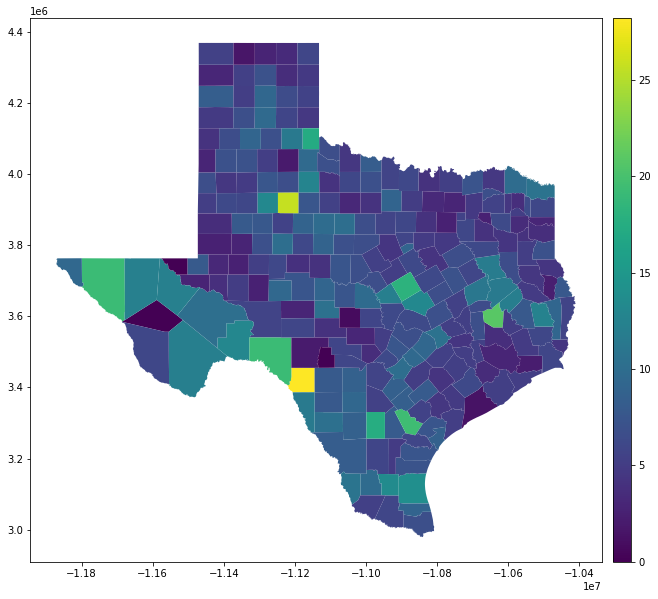

In [136]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(16,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3.3%", pad=0.15)

tx_acs_pa.plot('p_public_administration', ax=ax, cmap='viridis', legend=True, cax=cax)
#lane_fires_proj.plot(ax=ax, c='red')

In [137]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

<AxesSubplot:title={'center':'Ratio of public administration workers by county (%) in Texas, 2019'}>

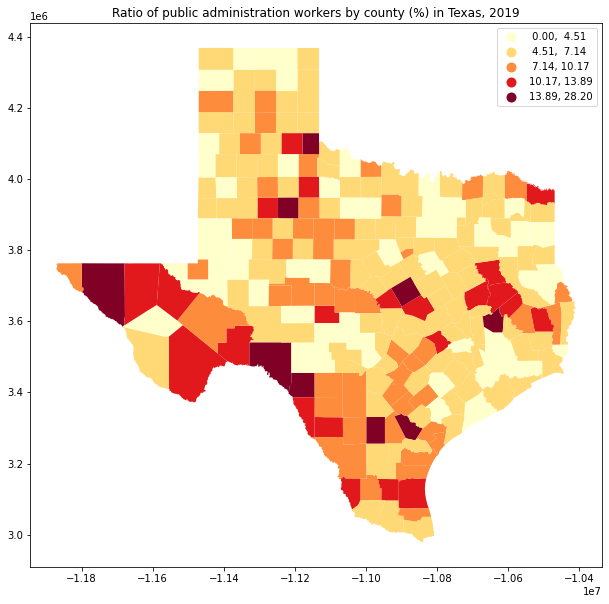

In [138]:
f, ax = plt.subplots(1, 1, figsize=(16,10))
ax.set_title("Ratio of public administration workers by county (%) in Texas, 2019")
tx_acs_pa.plot('p_public_administration', ax=ax, cmap='YlOrRd', legend=True, scheme = 'fisherjenks', k = 5)
